In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Load the data
df = pd.read_csv('Resources/medallists.csv')

# Display
df.head()

,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team
0,2024-07-27,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN
1,2024-07-27,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN
2,2024-07-27,Bronze Medal,3.0,van AERT Wout,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147,NaN
3,2024-07-27,Gold Medal,1.0,BROWN Grace,Female,AUS,Australia,Australia,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,NaN
4,2024-07-27,Silver Medal,2.0,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525,NaN


In [4]:
# Data Cleaning

# # Assess the data
df.info()

# remove missing values
df.dropna(inplace=True)

# remove duplicates
df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   medal_date    2315 non-null   object 
 1   medal_type    2315 non-null   object 
 2   medal_code    2314 non-null   float64
 3   name          2312 non-null   object 
 4   gender        2312 non-null   object 
 5   country_code  2312 non-null   object 
 6   country       2312 non-null   object 
 7   country_long  2312 non-null   object 
 8   nationality   2310 non-null   object 
 9   team          1555 non-null   object 
 10  team_gender   1555 non-null   object 
 11  discipline    2315 non-null   object 
 12  event         2315 non-null   object 
 13  event_type    2315 non-null   object 
 14  url_event     2294 non-null   object 
 15  birth_date    2312 non-null   object 
 16  code_athlete  2315 non-null   int64  
 17  code_team     1555 non-null   object 
dtypes: float64(1), int64(1), obj

In [5]:
# Filter by medal
gold_medals = df[df['medal_type'] == 'Gold Medal']
silver_medals = df[df['medal_type'] == 'Silver Medal']
bronze_medals = df[df['medal_type'] == 'Bronze Medal']



<Figure size 1200x800 with 0 Axes>

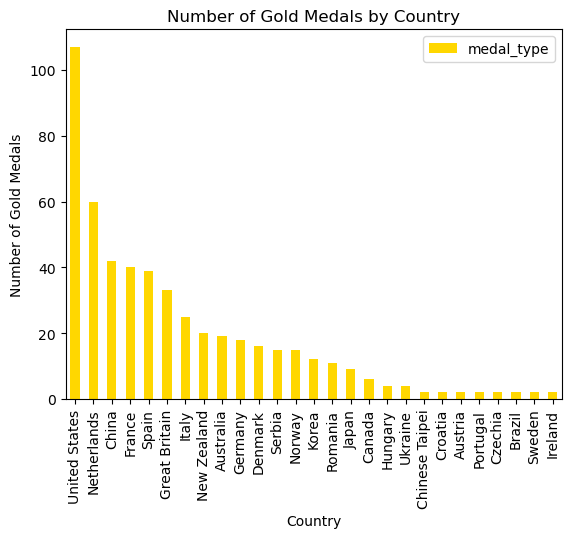

In [6]:
# Group by 'Country' and count the number of Gold medals
gold_medal_counts = gold_medals.groupby('country')['medal_type'].count().sort_values(ascending=False)

# Convert to Data Frame
gold_medal_counts = pd.DataFrame(gold_medal_counts)

# Plot the bar chart
plt.figure(figsize=(12, 8))
gold_medal_counts.plot(kind='bar', color='gold')
plt.title('Number of Gold Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=90)
plt.show()

In [7]:
#droping additional team medals 
gold_medals_df = gold_medals.drop(['name','birth_date', 'code_athlete'], axis=1)

# check for duplicates
duplicates = gold_medals_df.duplicated()

#dispaly rows that are duplicates
duplicate_rows = gold_medals_df[duplicates]

#display duplicates
duplicate_rows.head()

,medal_date,medal_type,medal_code,gender,country_code,country,country_long,nationality,team,team_gender,discipline,event,event_type,url_event,code_team
761,2024-07-27,Gold Medal,1.0,Female,CHN,China,People's Republic of China,China,People's Republic of China,W,Diving,Women's Synchronised 3m Springboard,TEAM,/en/paris-2024/results/diving/women-s-synchron...,DIVW3MTEAM2-CHN01
767,2024-07-27,Gold Medal,1.0,Male,FRA,France,France,France,France,M,Rugby Sevens,Men,HTEAM,/en/paris-2024/results/rugby-sevens/men/fnl-00...,RU7MTEAM7---FRA01
768,2024-07-27,Gold Medal,1.0,Male,FRA,France,France,France,France,M,Rugby Sevens,Men,HTEAM,/en/paris-2024/results/rugby-sevens/men/fnl-00...,RU7MTEAM7---FRA01
769,2024-07-27,Gold Medal,1.0,Male,FRA,France,France,France,France,M,Rugby Sevens,Men,HTEAM,/en/paris-2024/results/rugby-sevens/men/fnl-00...,RU7MTEAM7---FRA01
770,2024-07-27,Gold Medal,1.0,Male,FRA,France,France,France,France,M,Rugby Sevens,Men,HTEAM,/en/paris-2024/results/rugby-sevens/men/fnl-00...,RU7MTEAM7---FRA01


In [8]:
# Count the total number of duplicate rows
num_duplicates = gold_medals_df.duplicated().sum()

print(f"Number of duplicates rows: {num_duplicates}")

Number of duplicates rows: 402


<Figure size 1200x800 with 0 Axes>

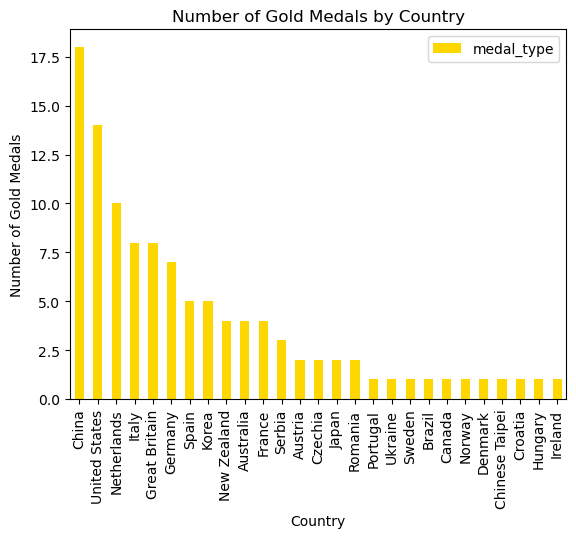

In [9]:
# Drop duplicated rows
gold_medals_updated =gold_medals_df.drop_duplicates(keep='first')

# updated plot
# Group by 'Country' and count the number of Gold medals
gold_medal_counts = gold_medals_updated.groupby('country')['medal_type'].count().sort_values(ascending=False)

# Convert to Data Frame
gold_medal_counts = pd.DataFrame(gold_medal_counts)

# Plot the bar chart
plt.figure(figsize=(12, 8))
gold_medal_counts.plot(kind='bar', color='gold')
plt.title('Number of Gold Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=90)
plt.show()

In [12]:
# find distribution of men and women who won gold medals
# filter dataframe to include gold medals from the US
us_gold_medals = gold_medals_updated[(gold_medals_updated['country_code'] == 'USA')]

# get the value counts for the gender breakdwon
gender_breakdown = us_gold_medals['gender'].value_counts()

# print distribution
print(gender_breakdown)


gender
Female    9
Male      5
Name: count, dtype: int64
